In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="keras.optimizers")


In [22]:
# Load and augment the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

training_set = datagen.flow_from_directory(
    'C:/Users/91994/Downloads/brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)



Found 203 images belonging to 2 classes.


In [23]:
valid_generator = datagen.flow_from_directory(
    'C:/Users/91994/Downloads/brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 50 images belonging to 2 classes.


In [29]:
import matplotlib.pyplot as plt
def plotImages(images, title):
    plt.figure(figsize=(16, 8))  # Increase the figure size
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray', interpolation='nearest')  # Use interpolation for better display
        plt.axis('off')
    plt.suptitle(title, fontsize=16)  # Increase the font size of the title
    plt.show()

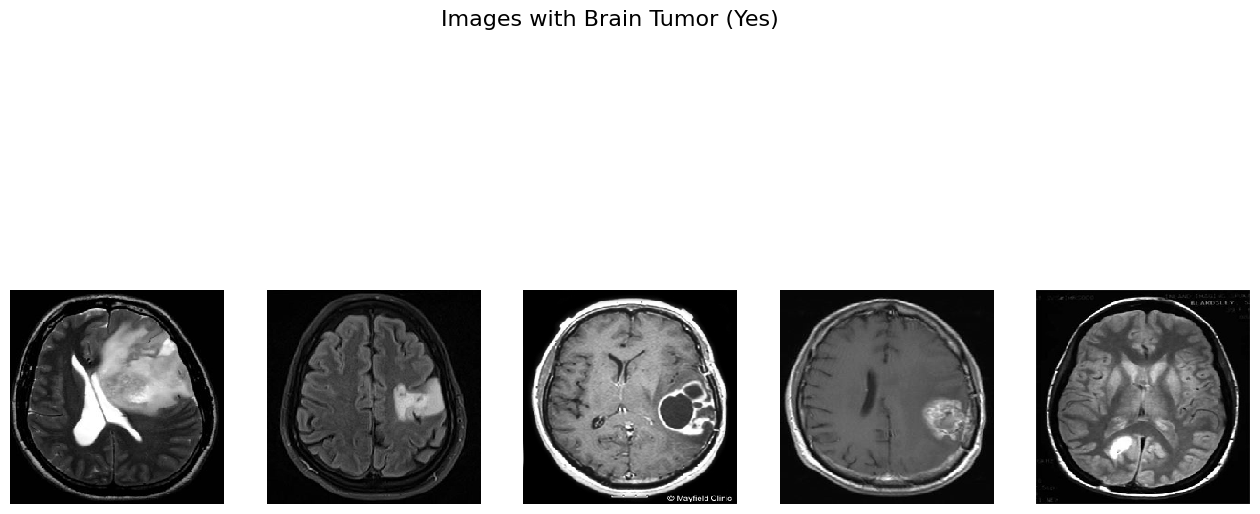

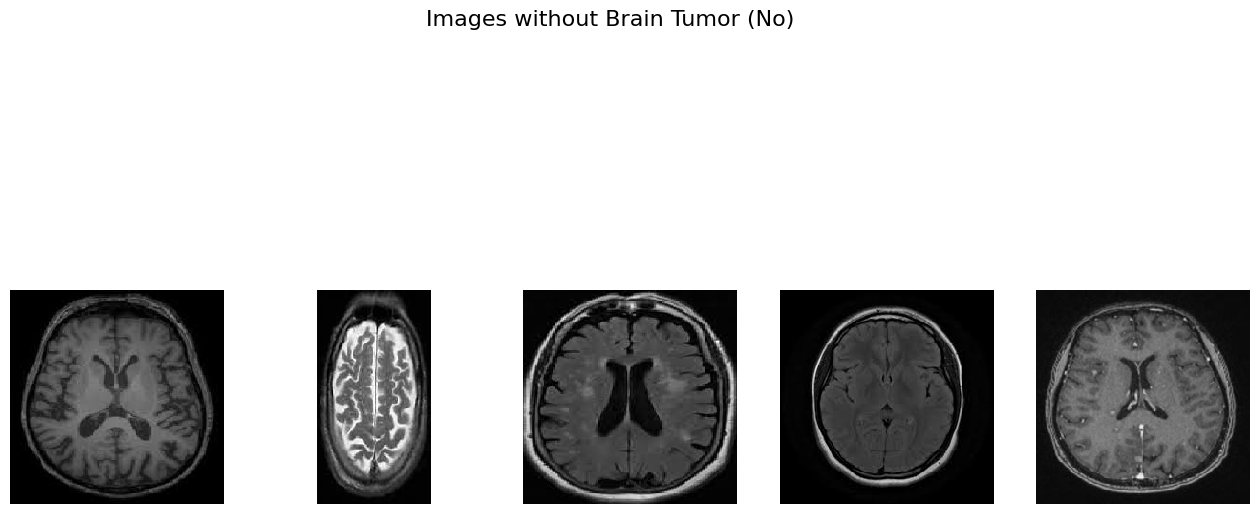

In [30]:

# Assuming training_set is correctly loaded and structured
# Visualize only the first five images from both classes (Yes and No)
images_yes = [training_set[0][0][i] for i in range(len(training_set[0][0])) if training_set[0][1][i] == 1][:5]
images_no = [training_set[0][0][i] for i in range(len(training_set[0][0])) if training_set[0][1][i] == 0][:5]

# Plot images for Yes class
plotImages(images_yes, 'Images with Brain Tumor (Yes)')

# Plot images for No class
plotImages(images_no, 'Images without Brain Tumor (No)')


In [24]:


# Build the model
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [25]:

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10
7/7 [==============================] - 16s 1s/step - loss: 1.2812 - accuracy: 0.5172 - val_loss: 0.5710 - val_accuracy: 0.7400
Epoch 2/10
7/7 [==============================] - 6s 940ms/step - loss: 0.5353 - accuracy: 0.7685 - val_loss: 0.5538 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 6s 827ms/step - loss: 0.4406 - accuracy: 0.8227 - val_loss: 0.5724 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 6s 839ms/step - loss: 0.4002 - accuracy: 0.8276 - val_loss: 0.4942 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 6s 877ms/step - loss: 0.3452 - accuracy: 0.8473 - val_loss: 0.4756 - val_accuracy: 0.7800
Epoch 6/10
7/7 [==============================] - 6s 828ms/step - loss: 0.2562 - accuracy: 0.8916 - val_loss: 0.5348 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 6s 882ms/step - loss: 0.1810 - accuracy: 0.9310 - val_loss: 0.4089 - val_accuracy: 0.8400
Epoch 8/10
7/7 [======

In [28]:

# Load and preprocess the image
test_image_path = 'Y17.jpg'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize pixel values to be between 0 and 1

# Make prediction
result = model.predict(test_image)

# Print the prediction
print(f"Prediction for {test_image_path}:")
if result[0] <= 0.5:
    print("No Brain Tumor")
else:
    print("Brain Tumor")


1/1 [==============================] - 0s 249ms/step
Prediction for Y17.jpg:
Brain Tumor


In [35]:
from keras.models import load_model

# Specify the folder path
folder_path = 'C:\\Users\\91994\\Desktop\\brain_tumor\\'

# Save the model in the specified folder
model.save(folder_path + 'brain_tumor_model.h5')
